# **Individual Assingment**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

## **A. DATA ENGINEERING (3 points)**

### **Question 1**

(2 points)

In [2]:
import pandas as pd
import numpy as np

In [3]:
tr_month = pd.read_csv("data/train_series.csv")
tr_month.shape

(120000, 5)

In [4]:
tr_month.head()

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,9910,JUNE,0.0,76885.0,3500.0
1,9910,MAY,0.0,79106.0,4000.0
2,9910,APRIL,0.0,81231.0,3000.0
3,9910,MARCH,0.0,81983.0,3146.0
4,9910,FEBRUARY,0.0,83773.0,3260.0


In [5]:
tr_month["MONTH"].value_counts()

JUNE        20000
MAY         20000
APRIL       20000
MARCH       20000
FEBRUARY    20000
JANUARY     20000
Name: MONTH, dtype: int64

In [6]:
tr_month = pd.pivot_table(tr_month,columns="MONTH", index=["ID"],aggfunc=np.sum)
tr_month.head()

BILL_AMT                                                     PAY  \
MONTH     APRIL  FEBRUARY   JANUARY      JUNE     MARCH       MAY APRIL   
ID                                                                        
0       13600.0   44024.0   18697.0   28991.0       0.0   24391.0   0.0   
1       53169.0   50372.0   49470.0   75662.0   50875.0   70073.0   0.0   
2      161487.0  168094.0  170922.0  155910.0  157577.0  158819.0   2.0   
3           0.0       0.0       0.0   23570.0       0.0     735.0  -2.0   
4        9044.0    9417.0    9617.0    8214.0    9225.0    8034.0   0.0   

                                       PAY_AMT                            \
MONTH FEBRUARY JANUARY JUNE MARCH  MAY   APRIL FEBRUARY  JANUARY    JUNE   
ID                                                                         
0         -1.0     0.0 -1.0   0.0  0.0     0.0    680.0  10000.0  1300.0   
1          0.0     0.0  0.0   0.0  0.0  2000.0   1903.0   2006.0  3212.0   
2          2.0     2.0  2.0   2.0  2.0     0.0   5500.0   1000.0  6800.0   
3         -2.0    -2.0 -2.0  -2.0 -2.0     0.0      0.0      0.0   742.0   
4          0.0     0.0  0.0   0.0  0.0   331.0    356.0    330.0  1140.0   

                        
MONTH    MARCH     MAY  
ID                      
0      22373.0  1000.0  
1       1603.0  2106.0  
2      13000.0  6500.0  
3          0.0     0.0  
4        341.0  1150.0

In [7]:
col_order1 = ["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE"]
tr_month = tr_month.reindex(col_order1, axis=1, level=1)
tr_month

BILL_AMT                                                       PAY  \
MONTH   JANUARY  FEBRUARY     MARCH     APRIL       MAY      JUNE JANUARY   
ID                                                                          
0       18697.0   44024.0       0.0   13600.0   24391.0   28991.0     0.0   
1       49470.0   50372.0   50875.0   53169.0   70073.0   75662.0     0.0   
2      170922.0  168094.0  157577.0  161487.0  158819.0  155910.0     2.0   
3           0.0       0.0       0.0       0.0     735.0   23570.0    -2.0   
4        9617.0    9417.0    9225.0    9044.0    8034.0    8214.0     0.0   
...         ...       ...       ...       ...       ...       ...     ...   
29993       0.0       0.0       0.0       0.0       0.0       0.0    -2.0   
29996    6941.0    2580.0    2580.0       0.0       0.0       0.0    -1.0   
29997    9009.0    8824.0   39420.0   46777.0   48381.0   47194.0     0.0   
29998   16565.0   29434.0   30841.0   29435.0   28530.0   28409.0     0.0   
29999    2290.0    3737.0    4246.0    3007.0   25790.0    2788.0    -2.0   

                                      PAY_AMT                            \
MONTH FEBRUARY MARCH APRIL  MAY JUNE  JANUARY FEBRUARY    MARCH   APRIL   
ID                                                                        
0         -1.0   0.0   0.0  0.0 -1.0  10000.0    680.0  22373.0     0.0   
1          0.0   0.0   0.0  0.0  0.0   2006.0   1903.0   1603.0  2000.0   
2          2.0   2.0   2.0  2.0  2.0   1000.0   5500.0  13000.0     0.0   
3         -2.0  -2.0  -2.0 -2.0 -2.0      0.0      0.0      0.0     0.0   
4          0.0   0.0   0.0  0.0  0.0    330.0    356.0    341.0   331.0   
...        ...   ...   ...  ...  ...      ...      ...      ...     ...   
29993     -2.0  -2.0  -2.0 -2.0 -2.0      0.0      0.0      0.0     0.0   
29996      0.0  -1.0  -2.0 -2.0  1.0      0.0   6941.0      0.0  2580.0   
29997      0.0   0.0   0.0  0.0  0.0    329.0    327.0   1000.0  1530.0   
29998      0.0   0.0   0.0  0.0  0.0      0.0    331.0   1765.0  2000.0   
29999     -2.0  -2.0  -2.0 -2.0 -2.0  22259.0   2290.0   3737.0  4305.0   

                        
MONTH     MAY     JUNE  
ID                      
0      1000.0   1300.0  
1      2106.0   3212.0  
2      6500.0   6800.0  
3         0.0    742.0  
4      1150.0   1140.0  
...       ...      ...  
29993     0.0      0.0  
29996     0.0      0.0  
29997  2000.0   2002.0  
29998  2000.0   2000.0  
29999  3007.0  25794.0  

[20000 rows x 18 columns]

### **Question 2**

(0.5 points)

In [8]:
tr_cust = pd.read_csv("data/train_customers.csv")
tr_cust.shape

(20000, 6)

In [9]:
tr_cust.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,9910,130000.0,2,2,1,27
1,15561,60000.0,2,3,1,48
2,23607,330000.0,2,1,2,44
3,6314,60000.0,2,2,2,24
4,27534,180000.0,2,1,2,33


In [10]:
join_month_cust = pd.DataFrame.merge(tr_cust,tr_month,on="ID")
join_month_cust = join_month_cust.set_index("ID")
join_month_cust

C:\Users\santi\AppData\Local\Temp\ipykernel_34596\2220857067.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  join_month_cust = pd.DataFrame.merge(tr_cust,tr_month,on="ID")


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"(BILL_AMT, JANUARY)","(BILL_AMT, FEBRUARY)","(BILL_AMT, MARCH)","(BILL_AMT, APRIL)","(BILL_AMT, MAY)",...,"(PAY, MARCH)","(PAY, APRIL)","(PAY, MAY)","(PAY, JUNE)","(PAY_AMT, JANUARY)","(PAY_AMT, FEBRUARY)","(PAY_AMT, MARCH)","(PAY_AMT, APRIL)","(PAY_AMT, MAY)","(PAY_AMT, JUNE)"
ID,,,,,,,,,,,,,,,,,,,,,
9910,130000.0,2,2,1,27,85532.0,83773.0,81983.0,81231.0,79106.0,...,0.0,0.0,0.0,0.0,3200.0,3260.0,3146.0,3000.0,4000.0,3500.0
15561,60000.0,2,3,1,48,2431.0,3910.0,4377.0,8422.0,5471.0,...,-1.0,-1.0,-1.0,-1.0,2120.0,2431.0,3918.0,4377.0,9683.0,5491.0
23607,330000.0,2,1,2,44,268145.0,262753.0,257535.0,253863.0,259517.0,...,0.0,2.0,0.0,0.0,9786.0,9766.0,9542.0,9400.0,0.0,21400.0
6314,60000.0,2,2,2,24,-2879.0,5879.0,15761.0,15069.0,18628.0,...,0.0,0.0,0.0,0.0,41378.0,1329.0,118.0,1000.0,1308.0,1538.0
27534,180000.0,2,1,2,33,1118.0,0.0,1500.0,178.0,2580.0,...,-1.0,-1.0,-2.0,-2.0,1331.0,1118.0,0.0,1500.0,178.0,2580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,330000.0,2,1,2,33,350.0,150.0,150.0,-200.0,-200.0,...,-1.0,-2.0,-2.0,1.0,0.0,200.0,0.0,350.0,0.0,0.0
17730,50000.0,1,2,2,49,18815.0,18077.0,34656.0,48551.0,53689.0,...,0.0,0.0,0.0,0.0,2000.0,1000.0,5618.0,2047.0,2124.0,2000.0
28030,410000.0,1,1,2,32,4133.0,4695.0,623.0,7764.0,13047.0,...,-1.0,-1.0,0.0,-1.0,4421.0,5973.0,4695.0,623.0,7764.0,10000.0


### **Question 3**

(0.5 points)

In [11]:
tr_target = pd.read_csv("data/train_target.csv")
tr_target.shape

(20000, 2)

In [12]:
tr_target = tr_target.set_index("ID")
tr_target.head()

,DEFAULT_JULY
ID,
9910,0
15561,1
23607,1
6314,0
27534,0


In [13]:
tr_target.index

Int64Index([ 9910, 15561, 23607,  6314, 27534, 21078, 24185, 13061, 23244,
            25684,
            ...
            26169, 13435,  7763, 15377, 21602, 28636, 17730, 28030, 15725,
            19966],
           dtype='int64', name='ID', length=20000)

In [14]:
santiago_suarez_A_train = pd.DataFrame.merge(join_month_cust,tr_target,on=["ID"],how="left")
santiago_suarez_A_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"(BILL_AMT, JANUARY)","(BILL_AMT, FEBRUARY)","(BILL_AMT, MARCH)","(BILL_AMT, APRIL)","(BILL_AMT, MAY)",...,"(PAY, APRIL)","(PAY, MAY)","(PAY, JUNE)","(PAY_AMT, JANUARY)","(PAY_AMT, FEBRUARY)","(PAY_AMT, MARCH)","(PAY_AMT, APRIL)","(PAY_AMT, MAY)","(PAY_AMT, JUNE)",DEFAULT_JULY
ID,,,,,,,,,,,,,,,,,,,,,
9910,130000.0,2,2,1,27,85532.0,83773.0,81983.0,81231.0,79106.0,...,0.0,0.0,0.0,3200.0,3260.0,3146.0,3000.0,4000.0,3500.0,0
15561,60000.0,2,3,1,48,2431.0,3910.0,4377.0,8422.0,5471.0,...,-1.0,-1.0,-1.0,2120.0,2431.0,3918.0,4377.0,9683.0,5491.0,1
23607,330000.0,2,1,2,44,268145.0,262753.0,257535.0,253863.0,259517.0,...,2.0,0.0,0.0,9786.0,9766.0,9542.0,9400.0,0.0,21400.0,1
6314,60000.0,2,2,2,24,-2879.0,5879.0,15761.0,15069.0,18628.0,...,0.0,0.0,0.0,41378.0,1329.0,118.0,1000.0,1308.0,1538.0,0
27534,180000.0,2,1,2,33,1118.0,0.0,1500.0,178.0,2580.0,...,-1.0,-2.0,-2.0,1331.0,1118.0,0.0,1500.0,178.0,2580.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,330000.0,2,1,2,33,350.0,150.0,150.0,-200.0,-200.0,...,-2.0,-2.0,1.0,0.0,200.0,0.0,350.0,0.0,0.0,0
17730,50000.0,1,2,2,49,18815.0,18077.0,34656.0,48551.0,53689.0,...,0.0,0.0,0.0,2000.0,1000.0,5618.0,2047.0,2124.0,2000.0,1
28030,410000.0,1,1,2,32,4133.0,4695.0,623.0,7764.0,13047.0,...,-1.0,0.0,-1.0,4421.0,5973.0,4695.0,623.0,7764.0,10000.0,0


In [15]:
import os  
os.makedirs('outputs', exist_ok=True)  
santiago_suarez_A_train.to_csv('outputs/santiago_suarez_A_train.csv')

## **B. EXPLORATORY DATA ANALYSIS (2 points)**

In [16]:
import matplotlib.pyplot as plt

In [17]:
train_data = santiago_suarez_A_train

In [18]:
train_data["EDUCATION"].max()

6

### **Question 1**

(0.5 points)

In [19]:
grad = train_data[(train_data["EDUCATION"]==1)]
uni = train_data[(train_data["EDUCATION"]==2)]
hs = train_data[(train_data["EDUCATION"]==3)]
other = train_data[(train_data["EDUCATION"]==4)]
unknown = train_data[(train_data["EDUCATION"]==5)]

In [20]:
grad.min()

LIMIT_BAL                10000.0
SEX                          1.0
EDUCATION                    1.0
MARRIAGE                     0.0
AGE                         21.0
(BILL_AMT, JANUARY)     -73895.0
(BILL_AMT, FEBRUARY)    -81334.0
(BILL_AMT, MARCH)       -81334.0
(BILL_AMT, APRIL)      -157264.0
(BILL_AMT, MAY)         -24704.0
(BILL_AMT, JUNE)        -14386.0
(PAY, JANUARY)              -2.0
(PAY, FEBRUARY)             -2.0
(PAY, MARCH)                -2.0
(PAY, APRIL)                -2.0
(PAY, MAY)                  -2.0
(PAY, JUNE)                 -2.0
(PAY_AMT, JANUARY)           0.0
(PAY_AMT, FEBRUARY)          0.0
(PAY_AMT, MARCH)             0.0
(PAY_AMT, APRIL)             0.0
(PAY_AMT, MAY)               0.0
(PAY_AMT, JUNE)              0.0
DEFAULT_JULY                 0.0
dtype: float64

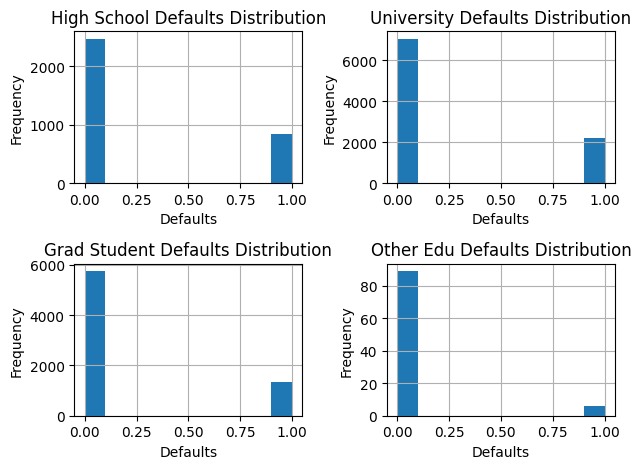

In [64]:
# Create the subplots
fig, axes = plt.subplots(2, 2)

# Plot the histograms
hs["DEFAULT_JULY"].hist(ax=axes[0][0])
uni["DEFAULT_JULY"].hist(ax=axes[0][1])
grad["DEFAULT_JULY"].hist(ax=axes[1][0])
other["DEFAULT_JULY"].hist(ax=axes[1][1])

# Add labels and title
axes[0][0].set_xlabel('Defaults')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_title('High School Defaults Distribution')

axes[0][1].set_xlabel('Defaults')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_title('University Defaults Distribution')

axes[1][0].set_xlabel('Defaults')
axes[1][0].set_ylabel('Frequency')
axes[1][0].set_title('Grad Student Defaults Distribution')

axes[1][1].set_xlabel('Defaults')
axes[1][1].set_ylabel('Frequency')
axes[1][1].set_title('Other Edu Defaults Distribution')

# Show the graph
fig.tight_layout()
plt.show()

In [33]:
#The distributions show that the most common University students, then graduates.
#We can also see through the distributions, that the more you've studied, the less likely you will allow default payments in July
#This is with the exception of other, which is extremely low compared to the other three

### **Question 2**

(0.5 points)

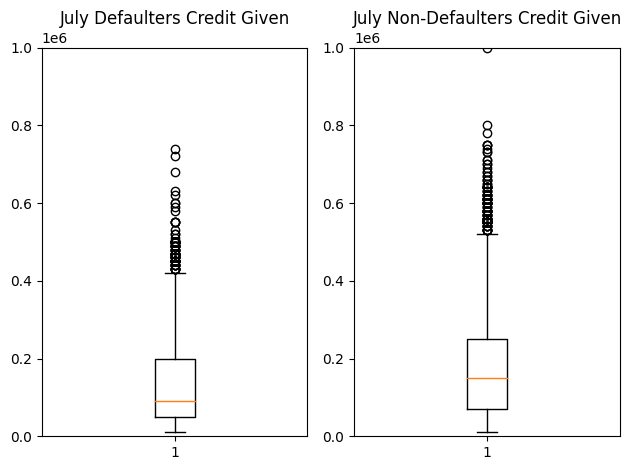

In [67]:
lim_def = train_data[train_data["DEFAULT_JULY"]==1]
lim_not_def = train_data[train_data["DEFAULT_JULY"]==0]

fig1, axes = plt.subplots(1,2)

axes[0].set_title('July Defaulters Credit Given')
axes[1].set_title('July Non-Defaulters Credit Given')
axes[0].boxplot(lim_def["LIMIT_BAL"])
axes[1].boxplot(lim_not_def["LIMIT_BAL"])

#set y axes range
axes[0].set_ylim([0, 1000000])
axes[1].set_ylim([0, 1000000])

fig1.tight_layout()

In [68]:
#As expected, peeople that don't default on loan payments are given higher amounts of credit on average than 
#people that default
#This can be seen in the 25%, mean, 75% and the maximum values, which are all higher in the non-defaulters

### **Question 3**

(1 point)

## **C. MACHINE LEARNING (5 points)**

### **Question 1**

(1.5 points)

### **Question 2**

(1 points)

### **Question 3**

(2.5 points)